In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
psoccer_df = pd.read_csv('./spi_matches.csv')

In [3]:
psoccer_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [4]:
psoccer_df.describe()

,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,21950.000000,21950.000000,26160.000000,26160.000000,14335.000000,14335.000000,14335.000000,14335.000000,14335.000000,14335.000000
mean,2135.269836,45.063587,45.012808,0.452489,0.294291,0.253220,1.527883,1.155568,31.126852,30.400100,1.532875,1.170031,1.499401,1.150133,1.416620,1.130272,1.549263,1.175981
std,707.363165,19.014775,19.001301,0.158496,0.142500,0.047425,0.429377,0.422366,25.963191,25.578376,1.282638,1.134546,0.826357,0.721491,0.650856,0.569210,1.250619,1.122141
min,1818.000000,3.880000,4.040000,0.027100,0.003200,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1849.000000,31.250000,31.240000,0.352475,0.201400,0.235000,1.250000,0.890000,10.800000,10.300000,1.000000,0.000000,0.880000,0.610000,0.960000,0.730000,1.050000,0.000000
50%,1871.000000,43.010000,42.890000,0.444100,0.278600,0.261100,1.460000,1.110000,25.900000,25.100000,1.000000,1.000000,1.370000,1.020000,1.320000,1.040000,1.050000,1.050000
75%,2160.000000,58.470000,58.340000,0.541725,0.368025,0.282300,1.730000,1.370000,45.100000,44.200000,2.000000,2.000000,1.970000,1.540000,1.760000,1.430000,2.100000,2.100000
max,5641.000000,96.570000,96.780000,0.977500,0.899200,0.453700,4.900000,4.060000,100.000000,100.000000,10.000000,8.000000,7.070000,6.200000,6.580000,5.920000,9.150000,7.930000


In [5]:
psoccer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 22 columns):
date           32264 non-null object
league_id      32264 non-null int64
league         32264 non-null object
team1          32264 non-null object
team2          32264 non-null object
spi1           32264 non-null float64
spi2           32264 non-null float64
prob1          32264 non-null float64
prob2          32264 non-null float64
probtie        32264 non-null float64
proj_score1    32264 non-null float64
proj_score2    32264 non-null float64
importance1    21950 non-null float64
importance2    21950 non-null float64
score1         26160 non-null float64
score2         26160 non-null float64
xg1            14335 non-null float64
xg2            14335 non-null float64
nsxg1          14335 non-null float64
nsxg2          14335 non-null float64
adj_score1     14335 non-null float64
adj_score2     14335 non-null float64
dtypes: float64(17), int64(1), object(4)
memory usage: 5.4+ M

#### I can already see that there are some columns which do not have complete values. Some of them have even less than half (xg1, xg2, nsxg1, nsxg2, adj_score1, adj_score2). This analysis also leads to another issue: I do not know what some of the columns mean. The dataset had no attached documentation therefore columns such as importance1, importance2 make no sense to me.

#### I will discard the following columns: xg1, xg2, nsxg1, nsxg2, adj_score1, adj_score2, because it would be too complicated to find a way to fill the data. Also, I have no idea what these columns mean. I believe that columns score1 and score2 are the actual scores for the games. However; it does not make much sense why there are some rows that do not have these data available.

In [6]:
psoccer_df[psoccer_df.score1.isna() | psoccer_df.score2.isna()]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
23657,2019-08-20,2413,English League One,Bolton,Doncaster Rovers,10.70,26.67,0.2318,0.5247,0.2436,...,35.3,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23778,2019-08-24,1832,Belgian Jupiler League,Sporting de Charleroi,Club Brugge,43.38,71.11,0.1919,0.5876,0.2205,...,10.7,26.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25771,2019-10-12,2414,English League Two,Cheltenham Town,Newport County,17.39,10.27,0.4540,0.2511,0.2950,...,58.1,49.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25773,2019-10-12,2413,English League One,Sunderland,Fleetwood Town,36.91,26.68,0.5422,0.2211,0.2367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25778,2019-10-12,2413,English League One,Burton Albion,Bolton,26.40,10.70,0.6509,0.1368,0.2123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26165,2019-10-23,1818,UEFA Champions League,Ajax,Chelsea,83.49,85.86,0.4470,0.3323,0.2208,...,40.2,75.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26166,2019-10-23,1818,UEFA Champions League,RB Leipzig,Zenit St Petersburg,80.78,77.99,0.5437,0.2173,0.2390,...,96.4,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26167,2019-10-23,1983,South African ABSA Premier League,Mamelodi Sundowns,Highlands Park FC,39.80,23.93,0.6370,0.1344,0.2286,...,90.8,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26168,2019-10-23,2412,English League Championship,Derby County,Wigan,45.90,42.26,0.4622,0.2545,0.2833,...,26.5,30.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26169,2019-10-23,2412,English League Championship,Fulham,Luton Town,65.02,39.97,0.7068,0.0993,0.1939,...,55.5,33.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Rows that do not have the scores available seem to be games that haven't been played yet or were postponed for a future/undefined date. Therefore, I will drop those rows from the training set.

In [7]:
psoccer_df.date = pd.to_datetime(psoccer_df.date)

In [8]:
psoccer_df.dtypes

date           datetime64[ns]
league_id               int64
league                 object
team1                  object
team2                  object
spi1                  float64
spi2                  float64
prob1                 float64
prob2                 float64
probtie               float64
proj_score1           float64
proj_score2           float64
importance1           float64
importance2           float64
score1                float64
score2                float64
xg1                   float64
xg2                   float64
nsxg1                 float64
nsxg2                 float64
adj_score1            float64
adj_score2            float64
dtype: object

In [9]:
psoccer_df[psoccer_df.score1.isna() | psoccer_df.score2.isna()].date.min()

Timestamp('2019-08-20 00:00:00')

#### That date corresponds to the English League One game between Bolton and Doncast Rovers which was scheduled for August 20th and got rescheduled for issues in one of the participating teams. Therefore I will drop all rows that have no score data as this will not be useful to train the model.

#### Now I will move on to figuring out what to do with the importance1 and importance2 columns

In [10]:
psoccer_df[psoccer_df.importance1.isna() | psoccer_df.importance2.isna()]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
157,2016-09-13,1818,UEFA Champions League,Bayern Munich,Rostov,94.80,59.97,0.9179,0.0155,0.0666,...,NaN,NaN,5.0,0.0,3.31,0.21,2.25,0.86,4.74,0.00
158,2016-09-13,1818,UEFA Champions League,Paris Saint-Germain,Arsenal,84.65,81.85,0.4587,0.2850,0.2563,...,NaN,NaN,1.0,1.0,2.59,0.72,1.81,2.30,1.05,1.05
159,2016-09-13,1818,UEFA Champions League,Dynamo Kiev,Napoli,80.70,76.79,0.3504,0.3697,0.2799,...,NaN,NaN,1.0,2.0,0.46,1.43,0.48,0.64,1.05,2.10
160,2016-09-13,1818,UEFA Champions League,PSV,Atletico Madrid,63.98,90.05,0.2004,0.5349,0.2646,...,NaN,NaN,0.0,1.0,1.38,1.23,1.83,1.80,0.00,1.05
161,2016-09-13,1818,UEFA Champions League,Barcelona,Celtic,95.90,62.22,0.8787,0.0398,0.0816,...,NaN,NaN,7.0,0.0,3.82,0.78,3.88,0.05,6.77,0.00
162,2016-09-13,1818,UEFA Champions League,Basel,Ludogorets,70.61,50.99,0.3468,0.3606,0.2926,...,NaN,NaN,1.0,1.0,0.81,0.49,1.24,0.38,1.05,1.05
163,2016-09-13,1818,UEFA Champions League,Benfica,Besiktas,74.49,59.93,0.6938,0.1159,0.1903,...,NaN,NaN,1.0,1.0,1.45,0.72,1.17,1.02,1.05,1.05
164,2016-09-14,1818,UEFA Champions League,Tottenham Hotspur,AS Monaco,75.03,72.40,0.5607,0.1875,0.2517,...,NaN,NaN,1.0,2.0,1.22,0.78,1.35,0.42,1.05,2.10
165,2016-09-14,1818,UEFA Champions League,Club Brugge,Leicester City,43.94,66.17,0.2386,0.5011,0.2602,...,NaN,NaN,0.0,3.0,0.87,2.16,1.16,1.06,0.00,3.15
166,2016-09-14,1818,UEFA Champions League,FC Porto,FC Copenhagen,74.39,51.74,0.6866,0.0901,0.2233,...,NaN,NaN,1.0,1.0,0.43,0.57,1.49,0.80,1.05,1.05


In [11]:
psoccer_df.importance1.describe()

count    21950.000000
mean        31.126852
std         25.963191
min          0.000000
25%         10.800000
50%         25.900000
75%         45.100000
max        100.000000
Name: importance1, dtype: float64

In [12]:
psoccer_df.importance2.describe()

count    21950.000000
mean        30.400100
std         25.578376
min          0.000000
25%         10.300000
50%         25.100000
75%         44.200000
max        100.000000
Name: importance2, dtype: float64

#### Interestingly, both columns have a similar distribution, mean and std. They fall in a similar scale between 0 and 100. Let's see what a game with importance 100 means.

In [13]:
psoccer_df[(psoccer_df.importance1 == 100) | (psoccer_df.importance2 == 100)]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
525,2016-10-29,1869,Spanish Primera Division,Barcelona,Granada,96.46,49.82,0.9775,0.0037,0.0188,...,100.0,47.4,1.0,0.0,1.98,0.04,2.96,0.02,1.05,0.00
741,2016-12-03,2411,Barclays Premier League,Manchester City,Chelsea,87.48,86.11,0.4914,0.2601,0.2485,...,100.0,100.0,1.0,3.0,2.72,1.39,2.12,1.38,1.05,2.63
752,2016-12-03,1869,Spanish Primera Division,Barcelona,Real Madrid,95.76,92.43,0.6423,0.1803,0.1775,...,100.0,100.0,1.0,1.0,1.88,1.46,1.68,1.98,1.05,1.05
885,2016-12-17,1854,Italy Serie A,Juventus,AS Roma,83.75,77.44,0.5925,0.1668,0.2407,...,100.0,91.4,1.0,0.0,0.70,0.62,1.29,1.34,1.05,0.00
947,2016-12-31,2411,Barclays Premier League,Chelsea,Stoke City,86.47,60.92,0.7734,0.0593,0.1674,...,100.0,10.9,4.0,2.0,1.86,0.94,3.22,1.16,3.83,2.10
1077,2017-01-22,1854,Italy Serie A,Juventus,Lazio,83.43,71.52,0.6544,0.1146,0.2310,...,100.0,76.6,2.0,0.0,1.43,0.31,1.55,1.03,2.10,0.00
1145,2017-01-29,1843,French Ligue 1,Paris Saint-Germain,AS Monaco,85.44,80.43,0.5479,0.2284,0.2237,...,100.0,100.0,1.0,1.0,1.64,0.60,1.66,0.74,1.05,1.05
1176,2017-02-04,1843,French Ligue 1,AS Monaco,Nice,80.51,64.40,0.6978,0.1121,0.1901,...,100.0,69.4,3.0,0.0,1.82,0.86,0.83,1.21,2.88,0.00
1252,2017-02-11,1843,French Ligue 1,AS Monaco,Metz,80.57,49.75,0.7941,0.0617,0.1442,...,100.0,21.8,5.0,0.0,2.18,0.51,1.91,0.47,5.25,0.00
1291,2017-02-17,1843,French Ligue 1,Bastia,AS Monaco,49.49,81.61,0.0937,0.7330,0.1734,...,54.1,100.0,1.0,1.0,0.64,1.38,0.93,2.36,1.05,1.05


#### This is still a lot of data to go over. Lets isolate it for a single team, Barcelona FC.

In [14]:
psoccer_df[((psoccer_df.importance1 == 100) & (psoccer_df.team1 == 'Barcelona')) | ((psoccer_df.importance2 == 100) & (psoccer_df.team2 == 'Barcelona'))]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
525,2016-10-29,1869,Spanish Primera Division,Barcelona,Granada,96.46,49.82,0.9775,0.0037,0.0188,...,100.0,47.4,1.0,0.0,1.98,0.04,2.96,0.02,1.05,0.00
752,2016-12-03,1869,Spanish Primera Division,Barcelona,Real Madrid,95.76,92.43,0.6423,0.1803,0.1775,...,100.0,100.0,1.0,1.0,1.88,1.46,1.68,1.98,1.05,1.05
2004,2017-04-23,1869,Spanish Primera Division,Real Madrid,Barcelona,92.62,94.88,0.3678,0.4340,0.1982,...,100.0,100.0,2.0,3.0,3.71,2.76,2.19,2.73,2.10,3.15
2069,2017-04-29,1869,Spanish Primera Division,Espanyol,Barcelona,71.41,95.16,0.1136,0.7292,0.1572,...,0.0,100.0,0.0,3.0,0.54,1.85,0.39,2.72,0.00,2.57
2156,2017-05-06,1869,Spanish Primera Division,Barcelona,Villarreal,95.56,80.12,0.8749,0.0343,0.0908,...,100.0,44.7,4.0,1.0,3.19,0.90,2.44,0.59,3.90,1.05
2296,2017-05-14,1869,Spanish Primera Division,Las Palmas,Barcelona,62.85,95.65,0.0792,0.8088,0.1120,...,0.0,100.0,1.0,4.0,0.75,1.61,1.04,2.11,1.05,4.18
8037,2018-02-20,1818,UEFA Champions League,Chelsea,Barcelona,80.97,94.45,0.2426,0.5205,0.2369,...,46.4,100.0,1.0,1.0,0.49,0.71,0.67,1.31,1.05,1.05
8649,2018-03-14,1818,UEFA Champions League,Barcelona,Chelsea,94.42,80.84,0.7777,0.0665,0.1559,...,100.0,82.9,3.0,0.0,0.81,0.65,1.55,1.39,3.15,0.00
9151,2018-04-04,1818,UEFA Champions League,Barcelona,AS Roma,93.60,79.11,0.7742,0.0622,0.1636,...,100.0,89.1,4.0,1.0,1.85,1.70,2.14,1.12,3.77,1.05
9375,2018-04-10,1818,UEFA Champions League,AS Roma,Barcelona,78.34,93.10,0.2493,0.5064,0.2443,...,100.0,100.0,3.0,0.0,2.68,0.91,1.49,0.69,2.84,0.00


#### Each one of these games were games of extreme importance for Barcelona. The team needed a win to remain in the top position or to classify to the next stage in a cup. Importance 1 and 2 reflect the importance of the game for each team.
#### Now we will see what happens with those rows where the importance1 and importance2 columns are empty.

In [15]:
psoccer_df[(psoccer_df.importance1.isna()) | (psoccer_df.importance2.isna())]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
157,2016-09-13,1818,UEFA Champions League,Bayern Munich,Rostov,94.80,59.97,0.9179,0.0155,0.0666,...,NaN,NaN,5.0,0.0,3.31,0.21,2.25,0.86,4.74,0.00
158,2016-09-13,1818,UEFA Champions League,Paris Saint-Germain,Arsenal,84.65,81.85,0.4587,0.2850,0.2563,...,NaN,NaN,1.0,1.0,2.59,0.72,1.81,2.30,1.05,1.05
159,2016-09-13,1818,UEFA Champions League,Dynamo Kiev,Napoli,80.70,76.79,0.3504,0.3697,0.2799,...,NaN,NaN,1.0,2.0,0.46,1.43,0.48,0.64,1.05,2.10
160,2016-09-13,1818,UEFA Champions League,PSV,Atletico Madrid,63.98,90.05,0.2004,0.5349,0.2646,...,NaN,NaN,0.0,1.0,1.38,1.23,1.83,1.80,0.00,1.05
161,2016-09-13,1818,UEFA Champions League,Barcelona,Celtic,95.90,62.22,0.8787,0.0398,0.0816,...,NaN,NaN,7.0,0.0,3.82,0.78,3.88,0.05,6.77,0.00
162,2016-09-13,1818,UEFA Champions League,Basel,Ludogorets,70.61,50.99,0.3468,0.3606,0.2926,...,NaN,NaN,1.0,1.0,0.81,0.49,1.24,0.38,1.05,1.05
163,2016-09-13,1818,UEFA Champions League,Benfica,Besiktas,74.49,59.93,0.6938,0.1159,0.1903,...,NaN,NaN,1.0,1.0,1.45,0.72,1.17,1.02,1.05,1.05
164,2016-09-14,1818,UEFA Champions League,Tottenham Hotspur,AS Monaco,75.03,72.40,0.5607,0.1875,0.2517,...,NaN,NaN,1.0,2.0,1.22,0.78,1.35,0.42,1.05,2.10
165,2016-09-14,1818,UEFA Champions League,Club Brugge,Leicester City,43.94,66.17,0.2386,0.5011,0.2602,...,NaN,NaN,0.0,3.0,0.87,2.16,1.16,1.06,0.00,3.15
166,2016-09-14,1818,UEFA Champions League,FC Porto,FC Copenhagen,74.39,51.74,0.6866,0.0901,0.2233,...,NaN,NaN,1.0,1.0,0.43,0.57,1.49,0.80,1.05,1.05


#### I was assuming that rows with empty importances were only referring to future games. However, there are some games which do not have any importances and yet they still have scores. I will replace this nan values with 0.

#### These were the last columns that had missing data, I will proceed to transform the data as I explained before.

In [16]:
psoccer_df.drop(['xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2'], axis=1, inplace=True)

In [17]:
psoccer_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0


In [18]:
psoccer_df.importance1.fillna(0, inplace=True)

In [19]:
psoccer_df.importance2.fillna(0, inplace=True)

In [20]:
psoccer_df[psoccer_df.importance1.isna() | psoccer_df.importance2.isna()]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2


#### The league column won't be useful for the model, we will drop it and leave the league_id column.

#### I will work on some visualizations to see if there are any obvious linear relationships between the remaining columns and the scores

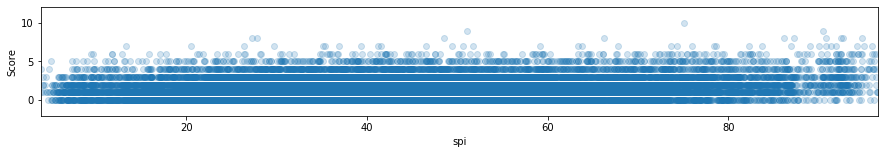

In [21]:
fig = plt.figure(figsize=[15,2])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(psoccer_df.spi1, psoccer_df.score1, alpha=0.2)
ax.set_xlabel('spi')
ax.set_ylabel('Score')
ax.margins(x=0, y= 0.2)

#### Let's try with the importance.

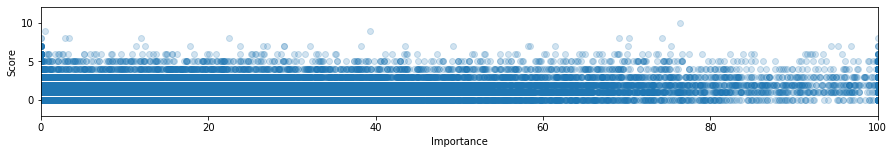

In [22]:
fig = plt.figure(figsize=[15,2])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(psoccer_df.importance1, psoccer_df.score1, alpha=0.2)
ax.set_xlabel('Importance')
ax.set_ylabel('Score')
ax.margins(x=0, y= 0.2)

#### Lets use the probabilites that were given to us.

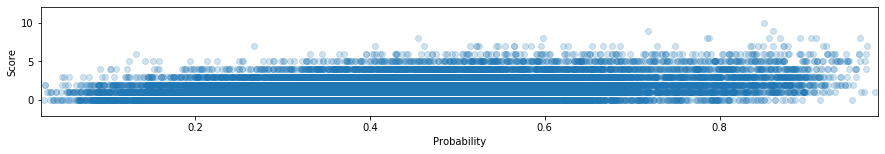

In [23]:
fig = plt.figure(figsize=[15,2])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(psoccer_df.prob1, psoccer_df.score1, alpha=0.2)
ax.set_xlabel('Probability')
ax.set_ylabel('Score')
ax.margins(x=0, y= 0.2)

#### From the previous graphs there are some ideas that I have acquired. The more the spi of a team, the more goals it will score. The more important a game is, the less goals a team will score. Finally, the more probabilities a team has of wining, the more goals it will score.
#### Now I want to see if the league where a team plays has any effect on the goals. I will use a scatter plot where each score will have a color based on the league of the game.

In [24]:
psoccer_df.league.value_counts()

English League Championship                 1666
Spanish Primera Division                    1520
French Ligue 1                              1520
Barclays Premier League                     1520
Italy Serie A                               1520
Spanish Segunda Division                    1398
German Bundesliga                           1224
Major League Soccer                         1217
Italy Serie B                               1204
United Soccer League                        1196
French Ligue 2                              1140
Brasileiro Série A                          1140
English League Two                          1109
English League One                          1063
Argentina Primera Division                   979
Portuguese Liga                              918
Dutch Eredivisie                             918
Turkish Turkcell Super Lig                   918
German 2. Bundesliga                         918
Swedish Allsvenskan                          720
Russian Premier Liga

In [25]:
psoccer_df.league.nunique()

37

#### We have 37 values in the league columns. Even though some of them belong to the same country (Mexican Primera Division Torneo Apertura & Clausura), we will let them be separates as each league can affect a teams performance.

In [26]:
psoccer_df[psoccer_df.league == 'Mexican Primera Division Torneo Apertura'][['score1','score2']].describe()

,score1,score2
count,460.000000,460.000000
mean,1.515217,1.158696
std,1.254963,1.013434
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,7.000000,5.000000


In [27]:
psoccer_df[psoccer_df.league == 'Mexican Primera Division Torneo Clausura'][['score1', 'score2']].describe()

,score1,score2
count,501.000000,501.000000
mean,1.508982,1.073852
std,1.249968,1.062325
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,6.000000


#### Both of the previous leagues have the same teams but are played at different times during the year and both have similar distributions.

In [28]:
psoccer_df[psoccer_df.league == 'Spanish Primera Division'][['score1','score2']].describe()

,score1,score2
count,1230.000000,1230.000000
mean,1.543902,1.174797
std,1.314973,1.166880
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,8.000000,6.000000


In [29]:
psoccer_df[psoccer_df.league == 'Spanish Segunda Division'][['score1','score2']].describe()

,score1,score2
count,1068.000000,1068.000000
mean,1.322097,0.941948
std,1.088062,0.960514
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,5.000000,5.000000


#### Both of the previous legues are played in the same country but with different teams. However, higher quality teams play in the Spanish Primera Division league. I was expecting to see a higher mean of goals in the Segunda Division but it seems the Primera Division has a higher mean.

#### Usually the first team to be displayed is the team that plays at home and this is case this seems to be true too. Score1, which corresponds to team1 is consistently higher than score2 which would correspond to the team that is playing away. So far we have only noticed this in the mexican and spanish leagues, let's see across all of the leagues how this behaves.

In [30]:
psoccer_df[['score1','score2']].describe()

,score1,score2
count,26160.000000,26160.000000
mean,1.532875,1.170031
std,1.282638,1.134546
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,8.000000


#### Across all of the leagues the mean score of the teams that play at home are higher than the ones playing away. I will add a feature that will tell wether or not the team is playing at home.

No handles with labels found to put in legend.


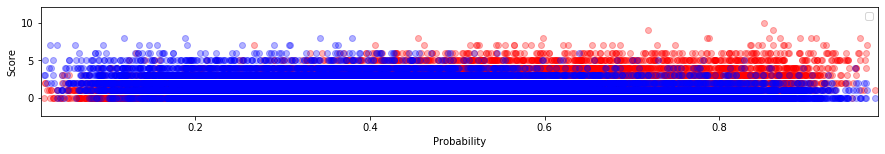

In [31]:
fig = plt.figure(figsize=[15,2])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(psoccer_df.prob1, psoccer_df.score1, alpha=0.3, c= 'red')
ax.scatter(psoccer_df.prob1, psoccer_df.score2, alpha=0.3, c= 'blue')
ax.set_xlabel('Probability')
ax.set_ylabel('Score')
ax.margins(x=0, y= 0.2)
plt.legend()

#### The previous graph show that as the probabilities of each team to score increase, teams that play at home (score1) score more goals suring a game.

In [32]:
psoccer_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0


#### One of the issues I will need to deal with is encoding each team as a numerical feature

In [33]:
psoccer_df[['team1','team2']].nunique()

team1    752
team2    752
dtype: int64

#### I have 752 unique teams which need to be encoded. I will do a comparison between using a simple label encoding and binary encoding. I will test both of these methods on a linear regression.

#### First I will test the label encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(psoccer_df.team1)

LabelEncoder()

In [35]:
le.transform(psoccer_df.team1)

array([ 80,  16, 337, ..., 537, 637, 410])

In [36]:
le.transform(psoccer_df.team2)

array([507, 311, 390, ..., 543, 574, 437])

In [37]:
lepsoccer_df = psoccer_df.copy()

In [38]:
lepsoccer_df['team1'] = le.transform(psoccer_df.team1)

In [39]:
lepsoccer_df['team2'] = le.transform(psoccer_df.team2)

In [40]:
lepsoccer_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2
0,2016-08-12,1843,French Ligue 1,80,507,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0
1,2016-08-12,1843,French Ligue 1,16,311,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0
2,2016-08-13,2411,Barclays Premier League,337,390,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0
3,2016-08-13,2411,Barclays Premier League,185,735,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0
4,2016-08-13,2411,Barclays Premier League,219,681,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0


In [41]:
le.inverse_transform(lepsoccer_df.team1)

array(['Bastia', 'AS Monaco', 'Hull City', ..., 'Racing Santander',
       'Sporting Gijón', 'Lugo'], dtype=object)

#### The encoding was done appropriately in this case. Now I will proceed to eliminate the league columns since we already have the league_id column which is a numerical feature

In [42]:
lepsoccer_df.drop(columns=['league'],inplace=True)

In [43]:
lepsoccer_df.head()

,date,league_id,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2
0,2016-08-12,1843,80,507,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0
1,2016-08-12,1843,16,311,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0
2,2016-08-13,2411,337,390,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0
3,2016-08-13,2411,185,735,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0
4,2016-08-13,2411,219,681,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0


#### Finally, I want to split the date variable into year, month and year.

In [44]:
lepsoccer_df['month'] = pd.DatetimeIndex(lepsoccer_df.date).month

In [45]:
lepsoccer_df.head()

,date,league_id,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,month
0,2016-08-12,1843,80,507,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0,8
1,2016-08-12,1843,16,311,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0,8
2,2016-08-13,2411,337,390,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,8
3,2016-08-13,2411,185,735,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,8
4,2016-08-13,2411,219,681,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,8


In [46]:
lepsoccer_df['day'] = pd.DatetimeIndex(lepsoccer_df.date).day

In [47]:
lepsoccer_df.head()

,date,league_id,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,month,day
0,2016-08-12,1843,80,507,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0,8,12
1,2016-08-12,1843,16,311,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0,8,12
2,2016-08-13,2411,337,390,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,8,13
3,2016-08-13,2411,185,735,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,8,13
4,2016-08-13,2411,219,681,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,8,13


In [48]:
lepsoccer_df['year'] = pd.DatetimeIndex(lepsoccer_df.date).year

In [49]:
lepsoccer_df.head()

,date,league_id,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,month,day,year
0,2016-08-12,1843,80,507,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0,8,12,2016
1,2016-08-12,1843,16,311,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0,8,12,2016
2,2016-08-13,2411,337,390,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,8,13,2016
3,2016-08-13,2411,185,735,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,8,13,2016
4,2016-08-13,2411,219,681,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,8,13,2016


In [50]:
lepsoccer_df.drop(columns=['date'],inplace=True)

In [51]:
lepsoccer_df.dropna(subset=['score1','score2'],how='all',inplace=True)

In [52]:
lepsoccer_df.head()

,league_id,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,month,day,year
0,1843,80,507,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0,8,12,2016
1,1843,16,311,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0,8,12,2016
2,2411,337,390,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,8,13,2016
3,2411,185,735,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,8,13,2016
4,2411,219,681,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,8,13,2016


In [53]:
train_df = lepsoccer_df.sample(frac=0.75, random_state=7)
test_df = lepsoccer_df.sample(frac=0.25, random_state=7)

In [54]:
train_X = train_df.drop(columns=['score1','score2']).copy()
train_Y = train_df[['score1','score2']].copy()

In [55]:
test_X = test_df.drop(columns=['score1','score2']).copy()
test_Y = test_df[['score1','score2']].copy()

##### Now I will proceed to build the model

In [56]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
scores = []
linear_model.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
linear_model.score(train_X, train_Y)

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.10340575173798784

In [58]:
linear_model.score(test_X, test_Y)

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.09564802891268956

#### The previous is a low score. Let's see what happens if we use a binary encoding for the teams.

In [119]:
psoccer_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0


In [146]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['team1','team2'])

In [147]:
encoder.fit(psoccer_df[['team1','team2']])

BinaryEncoder(cols=['team1', 'team2'], drop_invariant=False,
              handle_missing='value', handle_unknown='value', mapping=None,
              return_df=True, verbose=0)

In [148]:
dfbin = encoder.transform(psoccer_df[['team1','team2']])

In [149]:
binsoccer_df = pd.concat([psoccer_df,dfbin],axis=1).copy()

In [150]:
binsoccer_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,team2_1,team2_2,team2_3,team2_4,team2_5,team2_6,team2_7,team2_8,team2_9,team2_10
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,0,0,0,0,0,0,0,0,0,1
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,0,0,0,0,0,0,0,0,1,0
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,0,0,0,0,0,0,0,0,1,1
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,0,0,0,0,0,0,0,1,0,0
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,0,0,0,0,0,0,0,1,0,1


In [151]:
binsoccer_df.columns

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'team1_0', 'team1_1',
       'team1_2', 'team1_3', 'team1_4', 'team1_5', 'team1_6', 'team1_7',
       'team1_8', 'team1_9', 'team1_10', 'team2_0', 'team2_1', 'team2_2',
       'team2_3', 'team2_4', 'team2_5', 'team2_6', 'team2_7', 'team2_8',
       'team2_9', 'team2_10'],
      dtype='object')

In [152]:
binsoccer_df.drop(columns=['team1','team2','date','league'],inplace=True)

In [153]:
binsoccer_df.dropna(subset=['score1','score2'],how='all',inplace=True)

In [154]:
train_df = binsoccer_df.sample(frac=0.75, random_state=7)
test_df = binsoccer_df.sample(frac=0.25, random_state=7)

In [155]:
train_X = train_df.drop(columns=['score1','score2']).copy()
train_Y = train_df[['score1','score2']].copy()

In [157]:
linear_model.fit(train_X,train_Y)
linear_model.score(train_X, train_Y)

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.10446519857566466

In [158]:
test_X = test_df.drop(columns=['score1','score2']).copy()
test_Y = test_df[['score1','score2']].copy()

In [159]:
linear_model.score(test_X, test_Y)

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.09673300777232403

#### The results with binary encoding are slightly better than the ones I got when using label encoding.

### Summary of what I did on this project:
#### I first started by cleaning columns that had na values. There were a series of columns that I could not understand what they were doing there (xg1, xg2, nsxg1, nsxg2, adj_score1, adj_score2). I discarded these columns as they had half of the total amount of rows that I had available. Then I noticed that there were some rows that had no available scores. After some research I discovered that some of these rows belong to future games or games that were postponed for some reason. Then I focused on the importance1 & 2 columns which determine how important each game was for each team. To figure out this I had to compare the dates for each game along with the teams table situation in that specific cup.

#### Later I focused on the league column, I was worried because there are some leagues that are played in the same country. I did some analysis on the distribution of these situations and found that most of these leagues follow a similar distribution; therefore, I left them separated.

#### Then I used some visualizations to see if I can find any linear relations in the data. What I found out is that the more the spi of a team, the more goals it will score. The more important a game is, the less goals a team will score. Finally, the more probabilities a team has of wining, the more goals it will score.

#### I still needed to come up with a way to encode the data in the team1 & team2 columns. I decided to compare two approaches, label and binary encoding. Label encoding was simpler to implement since it is a simple mapping between the nominal features and integer values; however, it might introduce some sense of order into the data that is not there. On the other hand, binary encoding avoids this drawback but adds cardinality to the dataframe. Therefore, this will increase the training time for the model.

#### The model I used was a simple linear regression model. I first trained it over the data that uses the label encoding and achieved a bad score. Then I trained it using the data with the binary encoding and achieved a slightly better score but still bad. However, since the dataset is not that large, the training time did not increase by much.